In this assignment, you’ll be using the (binary) results of the 2011 ATP men’s tennis singles for 107 players
in a total of 1801 games (which these players played against each other in the 2011 season), to compute
probabilistic rankings of the skills of these players.

(Alternative to this assignment you can develop an prediction model for the credit assignment data set.)

#### Data

In [21]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import scipy.stats
import pymc
import operator
from matplotlib import pyplot as plt
import math


In [34]:
tennis_players = np.load("./tennis_players.npy")
tennis_players_count = len(tennis_players)
burn = tennis_players_count/2

In [3]:
#tennis_players

In [35]:
tennis_games = np.load("./tennis_games.npy")
tennis_games.shape

(1801, 2)

tennis_games is a 1801 by 2 matrix of the played games, one row per
game: the first column is the identity of the player who won the game, and the second column contains the
identity of the player who lost. 

#### Assignment

1. Use pymc to develop a probabilistic ranking system. The model should assign each player a score. 
2. Plot the ranking accoring to your (learnt) model.
3. Write a function which get's as input the ids of two player and prints (or returns) a prediction of the probabilities that player 1 resp. player 2 wins.
e.g.:
       > print_prediction(10, 12)   
       
       Andy-Murray: 0.56
       David-Nalbandian: 0.44

In [5]:
# df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)].describe()

# map(lambda x: x[0], tennis_games)

# d = dict((key, value) for (key, value) in tennis_games)

players = {}
for w, l in tennis_games:
    if (w in players):
        winner = players[w]
    else:
        winner = (0, 0)
    
    winner = (winner[0] + 1, winner[1])
    players[w] = winner
    
    if (l in players):
        loser = players[l]
    else:
        loser = (0, 0)
    
    loser = (loser[0], loser[1] + 1)
    players[l] = loser
    
players = dict(map(lambda (k,v): (k, (v[0],v[1],v[0]+v[1])), players.iteritems()))

players

{0: (57, 15, 72),
 1: (22, 24, 46),
 2: (35, 19, 54),
 3: (32, 25, 57),
 4: (58, 12, 70),
 5: (45, 24, 69),
 6: (12, 24, 36),
 7: (34, 22, 56),
 8: (22, 16, 38),
 9: (21, 25, 46),
 10: (47, 12, 59),
 11: (29, 18, 47),
 12: (16, 12, 28),
 13: (9, 14, 23),
 14: (22, 16, 38),
 15: (67, 7, 74),
 16: (24, 23, 47),
 17: (19, 24, 43),
 18: (15, 22, 37),
 19: (20, 23, 43),
 20: (26, 18, 44),
 21: (15, 21, 36),
 22: (16, 17, 33),
 23: (31, 9, 40),
 24: (29, 24, 53),
 25: (33, 23, 56),
 26: (17, 22, 39),
 27: (10, 21, 31),
 28: (27, 16, 43),
 29: (50, 19, 69),
 30: (15, 24, 39),
 31: (29, 20, 49),
 32: (29, 26, 55),
 33: (41, 22, 63),
 34: (12, 19, 31),
 35: (17, 16, 33),
 36: (8, 16, 24),
 37: (16, 16, 32),
 38: (4, 10, 14),
 39: (17, 19, 36),
 40: (17, 22, 39),
 41: (29, 25, 54),
 42: (36, 22, 58),
 43: (15, 26, 41),
 44: (15, 8, 23),
 45: (19, 23, 42),
 46: (25, 17, 42),
 47: (37, 26, 63),
 48: (17, 25, 42),
 49: (5, 8, 13),
 50: (13, 25, 38),
 51: (9, 26, 35),
 52: (19, 23, 42),
 53: (7, 23,

In [6]:
#provisional player score based on number of wins divided by number of games played
# ### players = dict(map(lambda(k,v): (k, (v[0], v[1], v[2], operator.truediv(v[0], v[2]))), players.iteritems() ))

#add names to dictionary:
players = dict(map(lambda(k,v): (k, ( v[0], v[1], v[2], pymc.Normal("skill", tau=1., mu=0.), tennis_players[k])), players.iteritems() ))

#wtf is the u doing in front of players's names

In [7]:
def getObservedData(playerId):
    wins = np.ones(players[playerId][0])
    losses = np.zeros(players[playerId][1])
    data = np.concatenate([wins, losses])
    return data
    
print getObservedData(0)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


number of matches player [ 2 ]:  54
number of wins player [ 2 ]:  35
observed data: 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Theta:  0.999999907095
 [-----------------100%-----------------] 11000 of 11000 complete in 0.3 secPlotting alpha


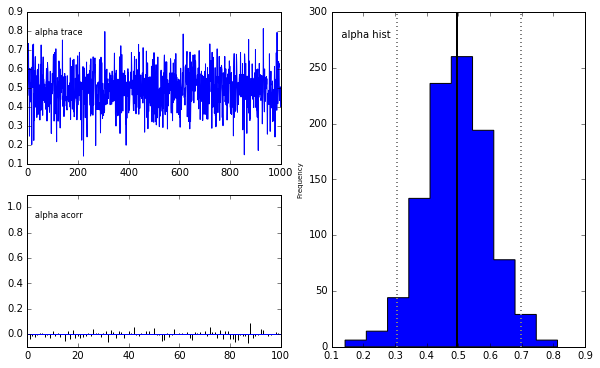

In [8]:
# 0: (57, 15, 72, 0.7916666666666666, u'Rafael-Nadal')
playerId = 2

#observed data
# number of matches player (per player)
n = players[playerId][2]
print "number of matches player [", playerId, "]: ", n
# number of wins
x = players[playerId][0]
print "number of wins player [", playerId, "]: ", x
# observed data
obs_data = getObservedData(playerId)
print "observed data: "
print obs_data

#define priors
alpha = pymc.Normal('alpha', mu=0.5, tau=100)
# beta = pymc.Normal('beta', mu=0.5, tau=0.01)

#define likelihood
theta = pymc.invlogit(alpha * x)
print "Theta: ", theta
y = pymc.Binomial('obs_data', n=n, p=theta, value=obs_data, observed=True, plot=True)


#plotting inference
m = pymc.Model([alpha, y])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)
pymc.Matplot.plot(mc)


In [87]:
print "Theta: ", theta

sigma = math.sqrt(theta)
plt.hist(theta.trace(), 15, histtype='step', normed=True, label='post');
a, b = plt.xlim()
x = np.linspace(0, 1, n)
a, b = (0 - 0.3) / 0.1, (1 - 0.3) / 0.1
plt.plot(x, stats.truncnorm.pdf(x, a, b, 0.3, 0.1), label='prior');

#provisional player score based on number of wins divided by number of games played
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[2], operator.truediv(v[0], v[2]))), players.iteritems() ))
plt.legend(loc='best');

Theta:  0.999999907095


ValueError: diag requires an array of at least two dimensions

In [14]:
#provisional player score based on number of wins divided by number of games played
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[2], pymc.Normal("skill", tau=1., mu=0.) )), players.iteritems() ))


In [70]:
skillz = [pymc.Normal("skill%i"%i, tau=1., mu=0.) for i in range(tennis_players_count)]
#print skillz
#ps = [pymc.invlogit("p_%i_%i_%i", (player_1, player_2, i), skillz[player_1] - skillz[player_2]) for i, (player_1, player_2) in range(tennis_players_count)]

# value: player 1 wins
# P: probability that player i wins in game i
# 

predictions = [pymc.Bernoulli("result_%i"%(i), observed=True, value=1, p=pymc.InvLogit("p", skillz[player_1] - skillz[player_2]))
               for i, (player_1, player_2) in enumerate(tennis_games)]
#predictions

In [60]:
m = pymc.Model([skillz, predictions])
mc = pymc.MCMC([m])
mc.sample(iter=tennis_players_count, burn=burn)
# mcmc.sample(nb_samples, burn=burn)#, thin=50)

 [-----------------100%-----------------] 107 of 107 complete in 7.4 sec

In [105]:
plt.hist(mc.trace(), 15, histtype="step", normed=True, label="post")
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 1, 0), label='prior');
plt.legend(loc="best")

TypeError: trace() takes at least 2 arguments (1 given)

In [106]:
low = 0.0000000001

def get_diff(p, pi1, pi2):
    diff = mc.trace("skill%i"%pi1)[p] - mc.trace("skill%i"%pi2)[p]
    return diff

def print_sample_results(most_probable=True):
    for i in range(len(tennis_players)):
        for j in range(len(tennis_players)):
            if (i == j):
                continue
            
            if most_probable:
                k = 0
                h = (tennis_players_count - burn) -1
            else:
                k = np.random.randint(low=0, high = tennis_players_count - burn)
                h = k+1
            
            diff_p1 = get_diff(h,i,j)
            if (diff_p1 < 0):
                diff_p1 = low
            
            victory = np.random.poisson(diff_p1)
            print "player " + str(i) + " vs Player" + str(j)
            print diff_p1
            print victory
            
print_sample_results()

player 0 vs Player1
1.71099349921
1
player 0 vs Player2
1.01550571039
0
player 0 vs Player3
1.63586897725
1
player 0 vs Player4
0.356556118116
1
player 0 vs Player5
0.788151857799
1
player 0 vs Player6
2.28212616025
1
player 0 vs Player7
1.47595878996
1
player 0 vs Player8
1.50062279544
5
player 0 vs Player9
2.05738431663
4
player 0 vs Player10
1e-10
0
player 0 vs Player11
0.579435933886
0
player 0 vs Player12
1.80170709038
4
player 0 vs Player13
3.10750679495
2
player 0 vs Player14
1.35983783906
3
player 0 vs Player15
1e-10
0
player 0 vs Player16
1.24831401478
1
player 0 vs Player17
1.75424194714
0
player 0 vs Player18
2.60001230749
3
player 0 vs Player19
1.70900803044
1
player 0 vs Player20
1.66624816729
0
player 0 vs Player21
2.45496219238
4
player 0 vs Player22
1.89691813008
5
player 0 vs Player23
0.730590175112
2
player 0 vs Player24
1.60896119521
3
player 0 vs Player25
1.5475178663
0
player 0 vs Player26
2.42472148553
2
player 0 vs Player27
3.13628774117
1
player 0 vs Player28
1.